In [15]:
import sys
import collections
import itertools
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy.spatial.distance import squareform

plt.style.use('bmh')
%matplotlib inline

def dtw_distance(ts_1, ts_2):    
     #ts_1: time serie 1 
     #ts_2: time serie 2
    
    ##TODO: USE fastdtw to calculate disitance between 2 time series
    distance, path = fastdtw(ts_1, ts_2, dist=euclidean)
    return distance
      
    
def dist_matrix(x, y):
    '''x, y are 2 arrays contains many time series '''
    x_s = np.shape(x)
    y_s = np.shape(y)
    dm = np.zeros((x_s[0], y_s[0])) 
    dm_size = x_s[0]*y_s[0]

    ##TODO: calculate distance matrix of 2 time series list/array

    for X in range(0,x_s[0]):
        for Y in range(0,y_s[0]):
            distance, path = fastdtw(x[X], y[Y], dist=euclidean)
            dm[X,Y] = distance
    return dm

### Calculate and visualize distance btw 2 series

Text(0.5, 1.0, 'DTW distance between A and B is 1515.0142442214292')

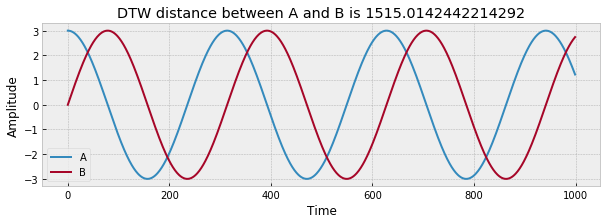

In [14]:
time = np.linspace(0,20,1000)
amplitude_a = 3*np.cos(time)
amplitude_b = 3*np.sin(time)

distance = dtw_distance(amplitude_a, amplitude_b)

##TODO: Visulize distance matrix of 2 time series
plt.figure(figsize = (10,3))
plt.title("DTW distance between A and B is: " + str(distance))
plt.plot(amplitude_a, label='A')
plt.plot(amplitude_b, label='B')
plt.xlabel("Time")
plt.ylabel("Aptitude")
plt.legend()
##Am I supposed to get a different distance? I installed fastdtw

### Test dist_matrix function

In [12]:
array1 = np.random.random((4,50))
array2 = np.random.random((4,50))     
print(dist_matrix(array1,array2))

Distance of  0 and 0
Distance of  0 and 1
Distance of  0 and 2
Distance of  0 and 3
Distance of  1 and 0
Distance of  1 and 1
Distance of  1 and 2
Distance of  1 and 3
Distance of  2 and 0
Distance of  2 and 1
Distance of  2 and 2
Distance of  2 and 3
Distance of  3 and 0
Distance of  3 and 1
Distance of  3 and 2
Distance of  3 and 3
[[11.67252849 11.23153308 11.18696516 10.10487689]
 [10.1579889  10.60562618  8.29507764  8.90213128]
 [11.29633455 10.421626   11.49198114 10.91217687]
 [10.93761384  9.42820397  9.41139733 16.14046695]]


### Implement KNN classification

In [2]:
class KNN(object):
    
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
    
    def fit(self, x, l):
        self.trainging_x = x
        self.training_label = l

    def predict(self, x):
        ##TODO: identify the k nearest neighbors using dist_matrix
       
        #TODO: Identify k nearest labels
        
        # Model Label
        mode_data = mode(knn_labels, axis=1)
        mode_label = mode_data[0]
        mode_proba = mode_data[1]/self.n_neighbors

        return mode_label.ravel(), mode_proba.ravel()


## Human Activity Recognition Dataset

In [5]:
# Import the HAR dataset
x_train_file = open('data/X_train.txt', 'r')
y_train_file = open('data/y_train.txt', 'r')

x_test_file = open('data/X_test.txt', 'r')
y_test_file = open('data/y_test.txt', 'r')

x_train = []
y_train = []
x_test = []
y_test = []

# Mapping table for classes
labels = {1:'WALKING', 2:'WALKING UPSTAIRS', 3:'WALKING DOWNSTAIRS',
          4:'SITTING', 5:'STANDING', 6:'LAYING'}

for x in x_train_file:
    x_train.append([float(ts) for ts in x.split()])
    
for y in y_train_file:
    y_train.append(int(y.rstrip('\n')))
    
for x in x_test_file:
    x_test.append([float(ts) for ts in x.split()])
    
for y in y_test_file:
    y_test.append(int(y.rstrip('\n')))
    
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

#### Visualizing sample activities from the HAR dataset

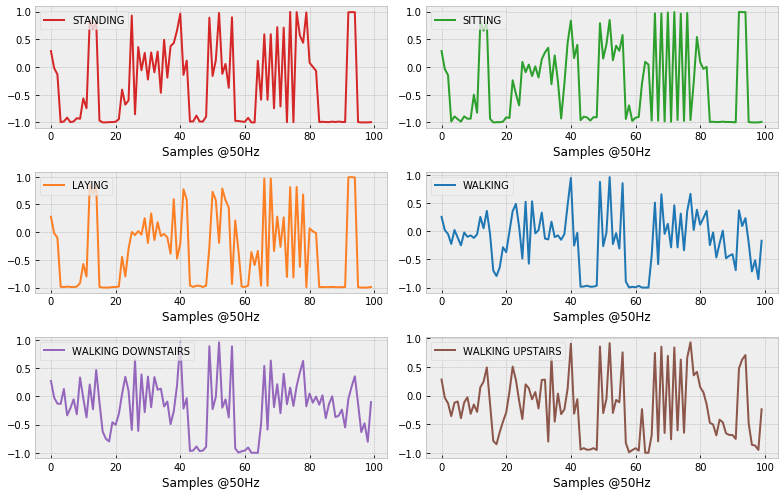

In [6]:
plt.figure(figsize=(11,7))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

##TODO: Visulize sample activities

In [8]:
m = KNN(n_neighbors=1)
m.fit(x_train, y_train)
label, proba = m.predict(x_test)

Distance of  0 and 0
Distance of  0 and 1
Distance of  0 and 2
Distance of  0 and 3
Distance of  0 and 4
Distance of  0 and 5
Distance of  0 and 6
Distance of  0 and 7
Distance of  0 and 8
Distance of  0 and 9
Distance of  0 and 10
Distance of  0 and 11
Distance of  0 and 12
Distance of  0 and 13
Distance of  0 and 14
Distance of  0 and 15
Distance of  0 and 16
Distance of  0 and 17
Distance of  0 and 18
Distance of  0 and 19
Distance of  0 and 20
Distance of  0 and 21
Distance of  0 and 22
Distance of  0 and 23
Distance of  0 and 24
Distance of  0 and 25
Distance of  0 and 26
Distance of  0 and 27
Distance of  0 and 28
Distance of  0 and 29
Distance of  0 and 30
Distance of  0 and 31
Distance of  0 and 32
Distance of  0 and 33
Distance of  0 and 34
Distance of  0 and 35
Distance of  0 and 36
Distance of  0 and 37
Distance of  0 and 38
Distance of  0 and 39
Distance of  0 and 40
Distance of  0 and 41
Distance of  0 and 42
Distance of  0 and 43
Distance of  0 and 44
Distance of  0 and 4

[8]
[8]


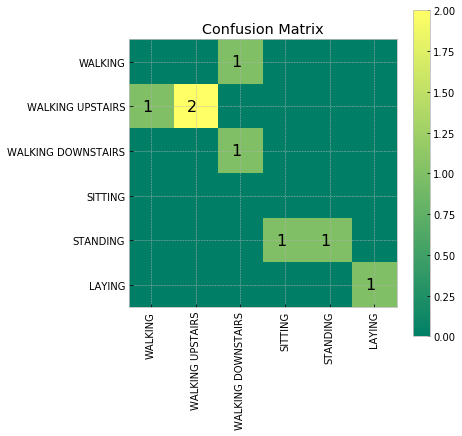

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

conf_mat = confusion_matrix(label, y_test)
##TODO: Visualize the confusion matrix